In [27]:
import os
import pathlib
from datasets import deep_fashion_ctsrbm

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import DataLoader
import torchvision.io
from torchvision.transforms import Resize, Lambda, Compose

import torch

from tqdm.notebook import trange, tqdm

---

In [28]:
ctsrbm_image_transform = Resize(size=(128, 128), antialias=True)
ctsrbm_dataset_dir = os.path.join(pathlib.Path.home(), "data", "DeepFashion", "Consumer-to-shop Clothes Retrieval Benchmark")
ctsrbm_dataset = deep_fashion_ctsrbm.ConsToShopClothRetrBmkImageLoader(ctsrbm_dataset_dir, img_transform=ctsrbm_image_transform)

In [36]:
ctsrbm_image_transform = torchvision.models.Swin_V2_T_Weights.DEFAULT.transforms()
ctsrbm_image_transform.antialias = True
ctsrbm_image_transform.crop_size = [256]
ctsrbm_image_transform.resize_size = [260]
ctsrbm_dataset_dir = os.path.join(pathlib.Path.home(), "data", "DeepFashion", "Consumer-to-shop Clothes Retrieval Benchmark")
ctsrbm_dataset = deep_fashion_ctsrbm.ConsToShopClothRetrBmkImageLoader(ctsrbm_dataset_dir, img_transform=ctsrbm_image_transform)

In [37]:
ctsrbm_image_transform

ImageClassification(
    crop_size=[520]
    resize_size=[520]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [38]:
def show_data_ConsToShopClothRetrBmkImageLoader(idx):

    image, item_id = ctsrbm_dataset[idx]

    image_copy = image

    if type(image) == torch.Tensor:
        image_copy = image_copy.permute(1, 2, 0)

    vmax = image_copy.max().item()
    vmin = image_copy.min().item()

    image_copy = (image_copy - vmin) / (vmax - vmin)

    plt.imshow(image_copy)
    
    title_lines = []
    title_lines.append("Image ID: {:d}".format(idx))
    title_lines.append("Item ID: {:d}".format(item_id))
    title_lines.append("Size: " + str(image_copy.size()))
    plt.title("\n".join(title_lines))

    plt.show()

---

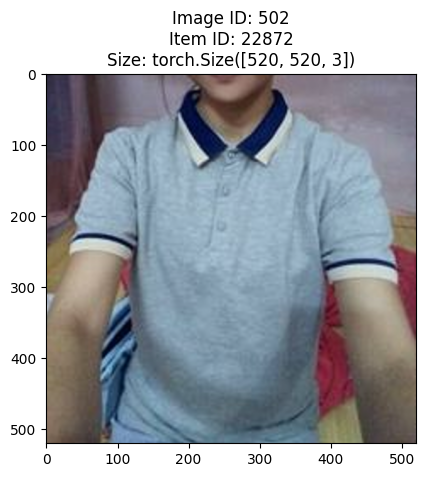

In [39]:
show_data_ConsToShopClothRetrBmkImageLoader(502)

In [29]:
img_idxs = [2133,
                           1216,
                           106622,
                           186259,
                           124060,
                           156906,
                           1360,
                           98885,
                           93252,
                           3491]

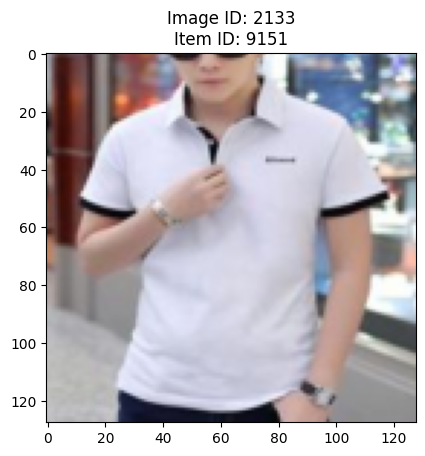

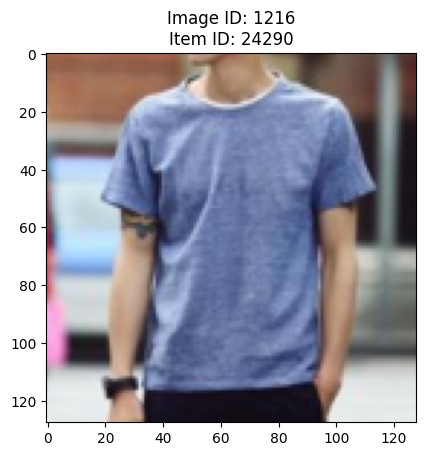

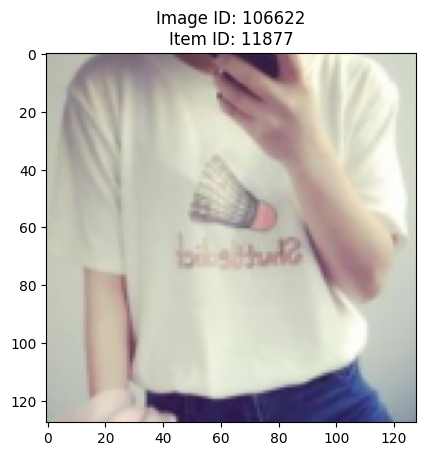

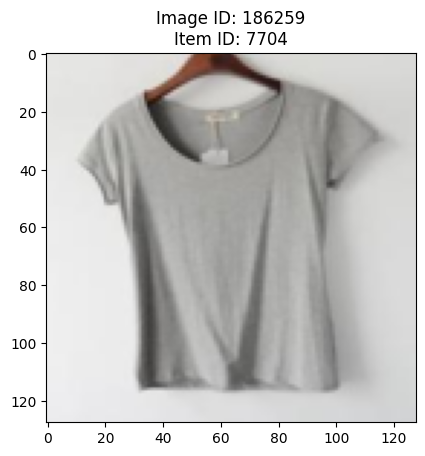

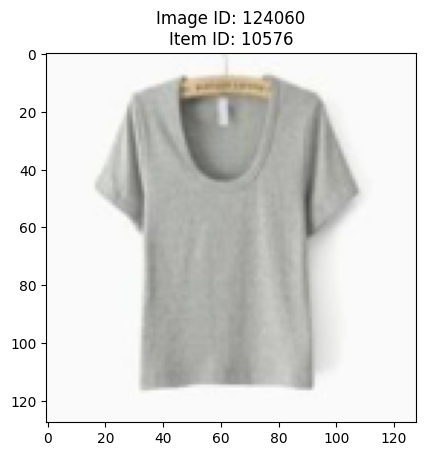

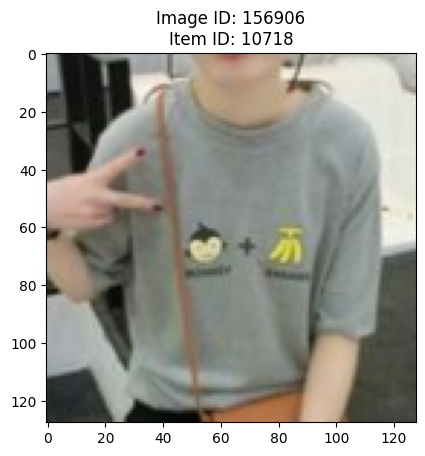

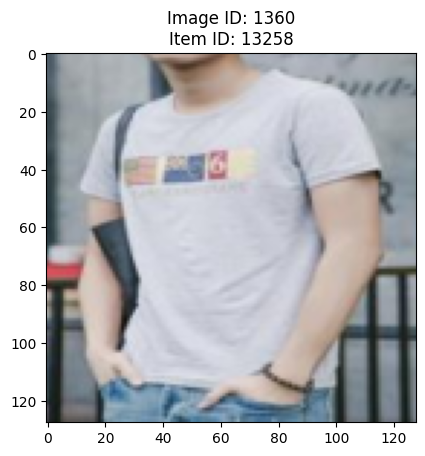

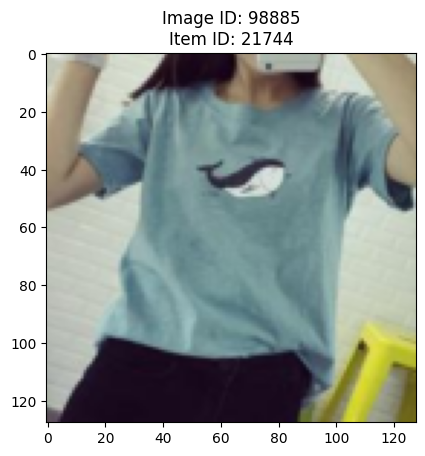

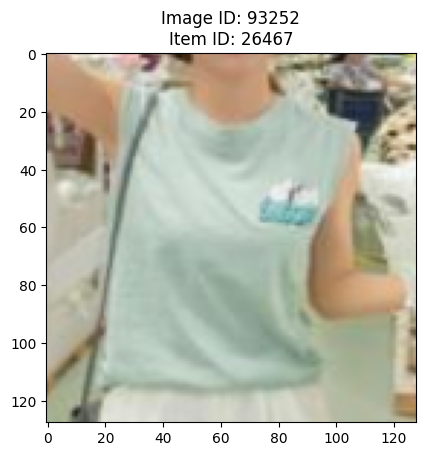

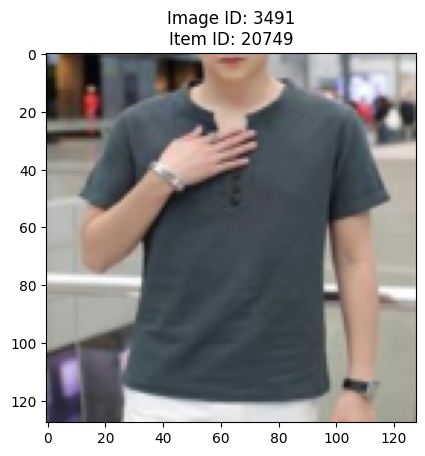

In [30]:
for img_idx in img_idxs:
    show_data_ConsToShopClothRetrBmkImageLoader(img_idx)